In [1]:
!pip install -q kaggle tensorflow matplotlib

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohailaamohamed","key":"777343fd20f07c7e1dd79774ff0f1ddc"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset
!mkdir -p data/mri
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p data/mri

# Unzip it
!unzip -q data/mri/brain-tumor-mri-dataset.zip -d data/mri

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [5]:
!mkdir -p data/non_mri
!wget http://madm.dfki.de/files/sentinel/EuroSAT.zip -O data/non_mri/eurosat.zip
!unzip -q data/non_mri/eurosat.zip -d data/non_mri


--2025-05-02 20:28:38--  http://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘data/non_mri/eurosat.zip’

data/non_mri/eurosa 100%[===================>]  89.91M  16.8MB/s    in 6.4s    

2025-05-02 20:28:45 (14.1 MB/s) - ‘data/non_mri/eurosat.zip’ saved [94280567/94280567]



In [6]:
!mkdir -p data/mri_detector/train/MRI data/mri_detector/train/NonMRI
!mkdir -p data/mri_detector/val/MRI data/mri_detector/val/NonMRI



In [7]:
# Copy 80% of MRI images to training folder
!find data/mri/Training/ -type f -name "*.jpg" | head -n 800 | xargs -I {} cp {} data/mri_detector/train/MRI/

# Copy 20% to validation folder
!find data/mri/Training/ -type f -name "*.jpg" | tail -n 200 | xargs -I {} cp {} data/mri_detector/val/MRI/


In [8]:
# Copy 80% of Non-MRI images to training folder
!find data/non_mri/2750/ -type f -name "*.jpg" | head -n 800 | xargs -I {} cp {} data/mri_detector/train/NonMRI/

# Copy 20% to validation folder
!find data/non_mri/2750/ -type f -name "*.jpg" | tail -n 200 | xargs -I {} cp {} data/mri_detector/val/NonMRI/


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10


In [10]:
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/mri_detector/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/mri_detector/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (MRI or Not)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.9054 - loss: 0.3432 - val_accuracy: 0.9975 - val_loss: 0.0130
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9975 - val_loss: 0.0104
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9999 - loss: 6.1391e-04 - val_accuracy: 0.9975 - val_loss: 0.0022
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9981 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 6.9610e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 1.0000 - loss: 3.2491e-04 - val_accuracy: 1.0000 - val_loss: 3.7577e-05
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.0000 - loss: 3.7892e-05 - val_accuracy: 1.0000 - val_loss: 2.2924e-05
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.0000 - loss: 2.4596e-05 - val_accuracy: 1.0000 - val_loss: 1.5754e-05
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.0000 - loss: 1.8964e-05 -

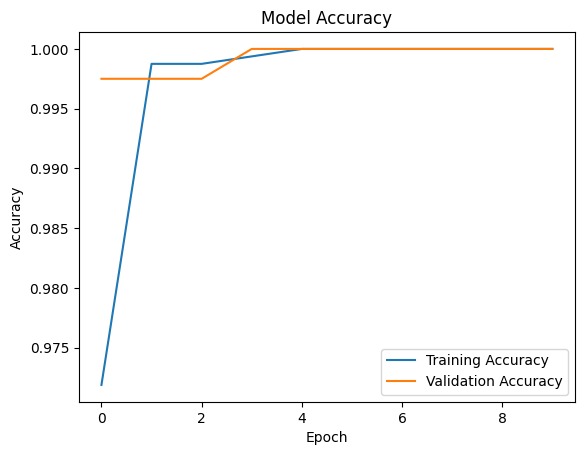

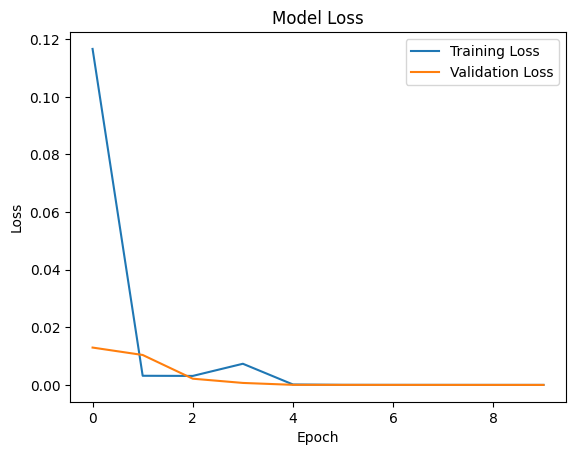

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image to predict
img_path = '/content/Te-gl_0010.jpg'

# Load the image with target size (same size used during training)
img = image.load_img(img_path, target_size=(128, 128))

# Convert image to a numpy array and rescale it
img_array = image.img_to_array(img) / 255.0  # Rescale
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
# Make a prediction
prediction = model.predict(img_array)

# Print the prediction
if prediction[0] > 0.5:
    print("This is a Non-MRI image.")
else:
    print("This is an MRI image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
This is an MRI image.


In [17]:
model.save('mri_detector_model.h5')


In [18]:
from google.colab import files
files.download('mri_detector_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>